In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [ ]:
frida = pd.read_csv("frida_classification.csv")

magnus = pd.read_csv("magnus_classification.csv")

marie = pd.read_csv("marie_classification.csv")

viggo = pd.read_csv("viggo_classification.csv")

gustav = pd.read_csv("gustav_classification.csv")

gustav

,img,benign,melanoma,keratosis,assymetry,border,color
0,ISIC_0001769.jpg,1,0,0,2,2,2
1,ISIC_0001852.jpg,0,1,0,3,4,7
2,ISIC_0001871.jpg,0,1,0,3,5,6
3,ISIC_0003462.jpg,1,0,0,2,2,3
4,ISIC_0003539.jpg,0,1,0,6,7,7
5,ISIC_0003582.jpg,0,1,0,7,6,5
6,ISIC_0003657.jpg,0,1,0,4,4,5
7,ISIC_0003805.jpg,0,1,0,4,5,5
8,ISIC_0004337.jpg,1,0,0,2,3,3
9,ISIC_0006651.jpg,1,0,0,2,2,3


In [ ]:
img_names = list(frida["img"])
features = list(frida.columns[1:])

dfs = [frida, magnus, marie, viggo, gustav]

columns=['melanoma', 'assymetry', 'border', 'color']
arrs = [np.array(df[columns]) for df in dfs]
full_arr = sum(arrs) / 5
columns[1] = 'asymmetry'
df_dict = {"image_id": [img[:-4] for img in img_names]}
for col, colname in zip(full_arr.T, columns):
    df_dict[colname] = col
df_dict['melanoma'] = np.round(df_dict['melanoma'])
full_df = pd.DataFrame(df_dict)
img_names = list(full_df['image_id'])

full_df.head()

,image_id,melanoma,asymmetry,border,color
0,ISIC_0001769,0.0,1.6,2.0,1.8
1,ISIC_0001852,1.0,2.0,2.4,4.4
2,ISIC_0001871,0.0,2.0,3.0,4.6
3,ISIC_0003462,0.0,1.8,2.6,3.6
4,ISIC_0003539,1.0,5.2,6.0,7.0


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
feature_df = pd.read_csv("../../features/features_example.csv")
feature_df = feature_df.loc[[img in img_names for img in feature_df['image_id']]]
A = ['asymmetry', 'asymmetry_gauss', 'border_score']
B = ['area', 'perimeter', 'compactness']
C = ["color_dist_10_5",
    "color_sd_10_5",
    "color_dist_10_10",
    "color_sd_10_10",
    "color_dist_5_5",
    "color_sd_5_5",
    "color_dist_5_10",
    "color_sd_5_10",
    "color_score"]

feature_names = [
        "asymmetry",
        "asymmetry_gauss",
        "area",
        "perimeter",
        "compactness",
        "color_dist_10_5",
        "color_sd_10_5",
        "color_dist_10_10",
        "color_sd_10_10",
        "color_dist_5_5",
        "color_sd_5_5",
        "color_dist_5_10",
        "color_sd_5_10",
        "color_score",
        "border_score"
    ]

A = [feature_names.index(s) for s in A]
B = [feature_names.index(s) for s in B]
C = [feature_names.index(s) for s in C]

x = np.array(feature_df[feature_names])
x = MinMaxScaler().fit_transform(x)


A = np.round(np.mean(x[:, A], axis=1) * 10, 1)
B = np.round(np.mean(x[:, B], axis=1) * 10, 1)
C = np.round(np.mean(x[:, C], axis=1) * 10, 1)

In [ ]:
full_df["asymmetry_script"] = A
full_df["border_script"] = B
full_df["color_script"] = C
full_df["melanoma_script"] = feature_df['melanoma']
full_df = full_df[['image_id', 'melanoma', 'melanoma_script', 'asymmetry', 'asymmetry_script', 'border', 'border_script', 'color', 'color_script']]
full_df.to_csv("../full_classification.csv")

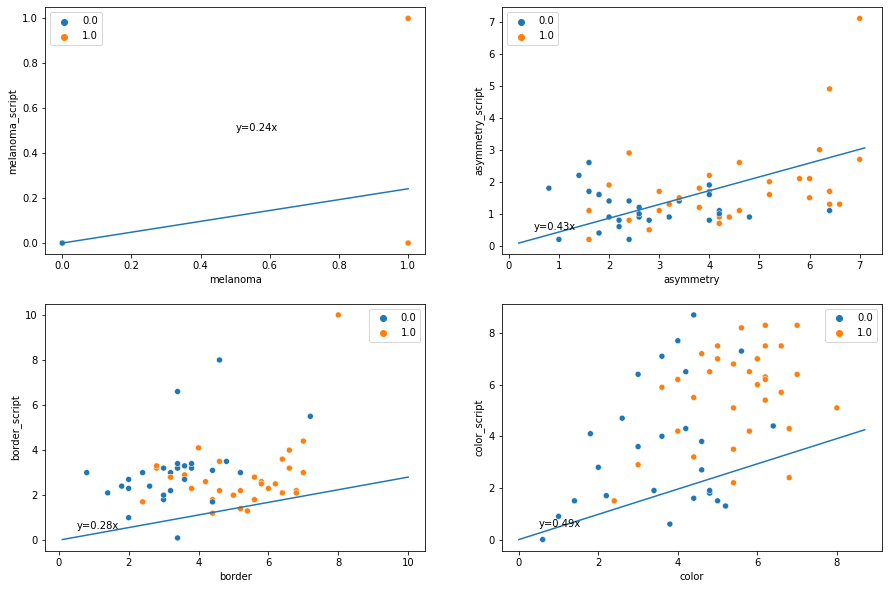

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for feat, ax in zip(["melanoma", "asymmetry", "border", "color"], axes.flatten()):
    sns.scatterplot(x=feat, y=feat + '_script', hue='melanoma', data=full_df, ax=ax)
    a = pearsonr(full_df[feat], full_df[feat + '_script'])[0]
    minimum = np.min([np.min(full_df[feat]), np.min(full_df[feat + "_script"])])
    maximum = np.max([np.max(full_df[feat]), np.max(full_df[feat + "_script"])])
    x = np.linspace(minimum, maximum, 100)
    sns.lineplot(x=x, y=x*a, ax=ax)
    ax.text(x=0.5, y=0.5, s='y=' + str(np.round(a, 2)) + 'x')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6840a14b-d41a-45b9-abd0-892354334cb2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>